In [1]:
cd ..

/home/tommy/Scrivania/Polimi/Honours Programme/SCFR


In [2]:
from data_structures.cfr_trees import *
from data_structures.trees import *
from cfr_code.reconstruction_cfr import *
from cfr_code.sample_cfr import *
from utilities.graphs import *
from games.kuhn import build_kuhn_tree

In [3]:
%load_ext autoreload
%autoreload 2

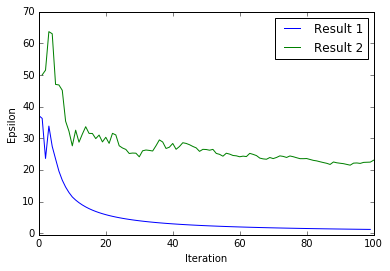

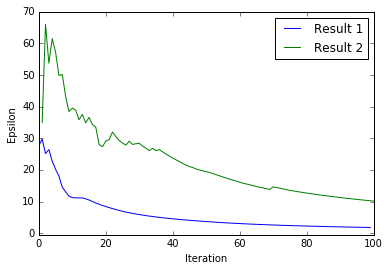

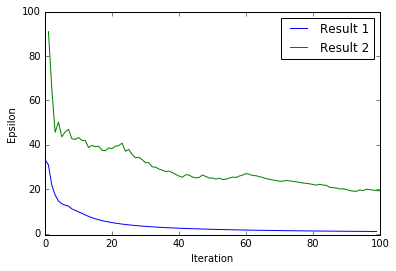

In [111]:
def test_random():
    tree = randomTree(8, 3, 0)
    cfr_tree = CFRTree(tree)
    ct1 = CFRTree(tree)
    res1 = SolveWithReconstructionCFR(ct1, 100, show_perc = False, checkEveryIteration = 1)
    ct2 = CFRTree(tree)
    res2 = SolveWithSampleCFR(ct2, 100, show_perc = False, checkEveryIteration = 1)
    comparative_epsilon_graph([res1, res2])
    return (res1, res2, tree)

test_trees = []
test_results = []
for i in range(3):
    (res1, res2, tree) = test_random()
    test_trees.append(tree)
    test_results.append((res1, res2))
    
print(test_results[0][0]["tot_time"] + test_results[1][0]["tot_time"] + test_results[2][0]["tot_time"])
print(test_results[0][1]["tot_time"] + test_results[1][1]["tot_time"] + test_results[2][1]["tot_time"])

------------ RCFR -------------
10.0%
20.0%
30.0%
40.0%
50.0%
60.0%
70.0%
80.0%
90.0%
100.0%
------------ RCFR+ -------------
10.0%
20.0%
30.0%
40.0%
50.0%
60.0%
70.0%
80.0%
90.0%
100.0%
------------ SCFR -------------
10.0%
20.0%
30.0%
40.0%
50.0%
60.0%
70.0%
80.0%
90.0%
100.0%


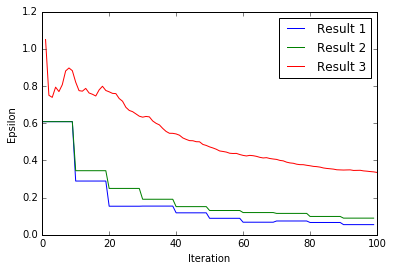

72.88977575302124
67.33653235435486
11.038153886795044


In [36]:
def test_kuhn():
    tree = build_kuhn_tree(3, 6)
    cfr_tree = CFRTree(tree)
    print("------------ RCFR -------------")
    ct1 = CFRTree(tree)
    res1 = SolveWithReconstructionCFR(ct1, 100, show_perc = True, checkEveryIteration = 1, 
                                      reconstructEveryIteration = 10)
    print("------------ RCFR+ -------------")
    ct2 = CFRTree(tree)
    res2 = SolveWithReconstructionCFR(ct2, 100, show_perc = True, checkEveryIteration = 1, 
                                      reconstructEveryIteration = 10, use_cfr_plus = True)
    print("------------ SCFR -------------")
    ct3 = CFRTree(tree)
    res3 = SolveWithSampleCFR(ct3, 100, show_perc = True, checkEveryIteration = 1)
    comparative_epsilon_graph([res1, res2, res3])
    return (res1, res2, res3, tree)


(res1, res2, res3, tree) = test_kuhn()
    
print(res1["tot_time"])
print(res2["tot_time"])
print(res3["tot_time"])

In [30]:
res4["tot_time"]

949.8841786384583

In [33]:
len(res1["joint"].plans)

89

In [35]:
len(res2["joint"].plans)

67